# Grafos con sage(math)

En este bloc veremos cómo utilizar las funciones básicas de sage para trabajar con grafos

Vanos a crear nuestro primer grafo. sage tiene incluidas muchas funciones para definir grafos, y muchos grafos predefinidos. Como ejemplo, vamos a trabajar con $K_5$.

In [25]:
g=graphs.CompleteGraph(5)

Podemos visualizarlo con el comando `show`.

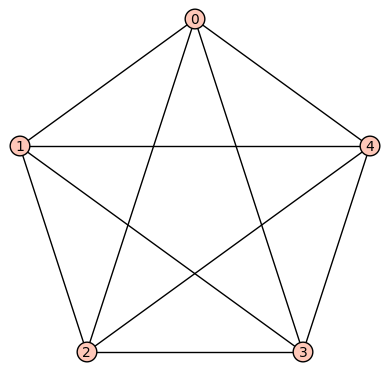

In [26]:
show(g)

Podemos mostrar la secuencia de grados.

In [27]:
g.degree()

[4, 4, 4, 4, 4]

O el diámetro.

In [28]:
g.diameter()

1

Los vértces de las distintas componentes conexas (en este caso sólo una).

In [29]:
g.connected_components()

[[0, 1, 2, 3, 4]]

In [30]:
g.is_connected()

True

Podemos borrar lados o nodos, y añadirlos.

In [31]:
g.delete_edges([(0,1),(2,3),(0,4),(1,2),(3,4)])

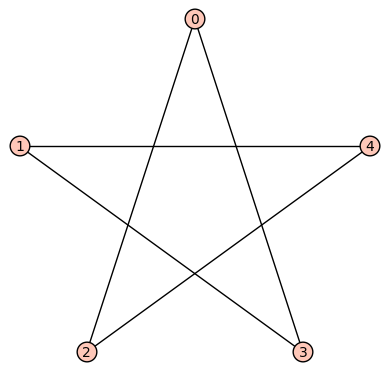

In [32]:
g.show()

Podemos también crear un grafo desde cero y luego añadirle lo que deseemos.

In [33]:
g=graphs.EmptyGraph()

In [34]:
g.add_edges([(1,2),(3,4)])

In [35]:
g.connected_components() 

[[1, 2], [3, 4]]

Calcular matriz de adyacencia e incidencia.

In [36]:
g.adjacency_matrix()

[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]

In [37]:
g.incidence_matrix()

[1 0]
[1 0]
[0 1]
[0 1]

Veamos si $K_5$ es o no euleriano, y caso de serlo, calculemos un circuito de Euler.

In [38]:
g=graphs.CompleteGraph(5)
g.is_eulerian() 

True

In [39]:
g.eulerian_circuit(labels=false)

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

**Ejemplo** (*Generando grafos con características especiales*)  Diez personas están sentadas alrededor de una mesa circular. Cada persona estrecha la mano a todos los demás excepto a la persona sentada directamente enfrente de la mesa. Dibuja un grafo que modele la situación.

In [40]:
G=graphs.EmptyGraph()

La estrategia que vamos a seguir es crear los lados a partir de parejas. Éstas son elementos $(p,q)$ del producto cartesiano $\{0,\ldots, 9\}^2$ tales que $5\mid p-q$.

In [41]:
c=CartesianProduct(range(10),range(10))

Y ahora seleccionamos las parejas que verifican la condición que impusimos arriba. El conjunto (en este caso hacemos una lista) $e=\{ (a,b)\in c \mid (a-b)\not\equiv 0\ \mathrm{mod}\ 5\}$ lo podemos expresar de la siguente forma:

In [42]:
e=[p for p in c if ((p[0]-p[1])%5)!=0]

Añadimos esos lados a nuestro grafo.

In [43]:
G.add_edges(e)

Y lo dibujamos.

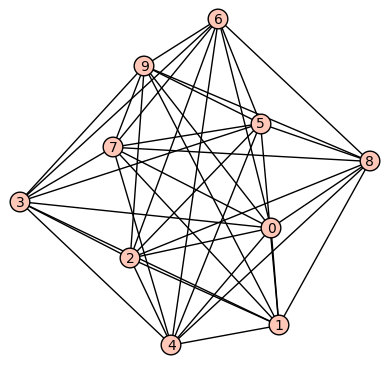

In [44]:
G.show()

Si queremos ver los vértices en un círculo, lo podemos hacer con la opción `layout='circular'`.

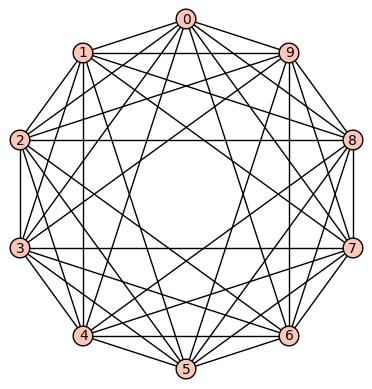

In [45]:
G.show(layout='circular')

**Ejemplo** (*Grafos isomorfos*) Vamos a ver si dos grafos dados son isomorfos. Tomemos como $G_1$ el grafo $K_5$ quitando los lados $\overline{13}$ y $\overline{14}$; y $G_2$ el grafo $K_5$ al que quitamos los lados $\overline{03}$ y $\overline{25}$

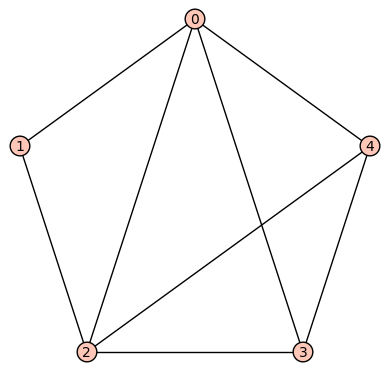

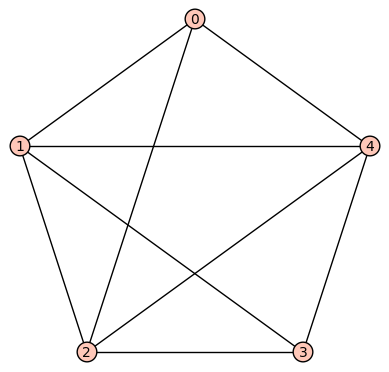

[None, None]

In [46]:
G1=graphs.CompleteGraph(5)
G2=G1.copy()
G1.delete_edges([(1,3),(1,4)])
G2.delete_edges([(0,3),(2,5)])
[show(G1,layout='circular'),show(G2,layout='circular')]

In [47]:
G1.is_isomorphic(G2)

False

Lo cual era de esperar si miramos sus secuencias de grados.

In [48]:
G1.degree()

[4, 2, 4, 3, 3]

In [49]:
G2.degree()

[3, 4, 4, 3, 4]

**Ejemplo** (*Clasificación salvo isomorfismo*) Vamos a clasificar salvo isomorfismo todos los subgrafos de $K_4$ con cuatro lados.

Empezamos construyendo todos los subgrafos de cuatro vértices de $K_4$. Para ello tomamos todos los subconjuntos de sus lados, y se los vamos quitando.

In [50]:
G=graphs.CompleteGraph(4)
lados=Set(G.edges(labels=false))
H=[]
for ls in Set(lados.subsets()):
    Gt=graphs.EmptyGraph();
    Gt.add_vertices(range(4));
    Gt.add_edges(ls);
    H.append(Gt);
len(H)

64

Ahora que los tenemos todos, los clasificamos por isomorfismo.

In [51]:
clases=[]
while H!=[]:
    c=[h for h in H if H[0].is_isomorphic(h)]
    clases.append(c)
    H=[h for h in H if not(h in c)]
len(clases)

11

Por último, los pintamos (basta pintar uno de cada clase de equivalencia)

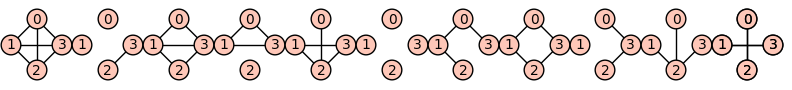

In [52]:
gr=graphics_array([clases[i][0].plot(figsize=1,layout='circular') for i in range(11)])
gr.show()

**Ejemplo** (*Euler*) 

El problema de los siete puentes de la ciudad de Königsberg, en la antigua Prusia oriental en el siglo XVIII, ciudad natal de Kant y, actualmente Kaliningrado (Rusia) es un célebre problema matemático que fue resuelto por Leonhard Euler en 1736 y dio origen a la Teoría de Grafos.

La ciudad estaba dividida en cuatro zonas por el río Pregel. Estas cuatro zonas estaban unidas por siete puentes. Los habitantes de la ciudad, durante sus paseos, intentaban encontrar una ruta que cruzase cada uno de los siete puentes una sola vez, y acabase en el mismo lugar que habían empezado.

Euler enfocó el problema representando las cuatro partes de tierra por un punto y cada uno de los siete puentes por una línea, uniendo los puntos que se corresponden. Entonces, el problema anterior se puede trasladar a la siguiente pregunta: ¿se puede recorrer el dibujo terminando en el punto de partida sin repetir las líneas?

El grafo asociado al problema de los puentes de Könisberg es el siguiente.

In [53]:
A=graphs.EmptyGraph();
A.add_vertices(['A','I','B','C'])
A.add_edges([('A','I'),('A','I'),('I','B'),('I','B'),('A','C'),
('I','C'),('B','C')])

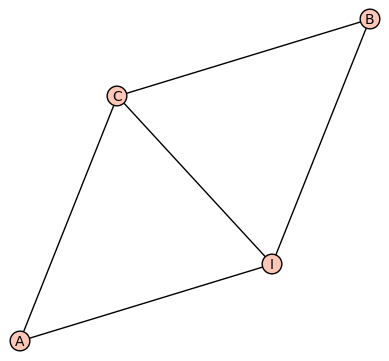

In [54]:
A.show()

In [55]:
A.is_eulerian()

False

**Ejemplo** (*Grafos a partir de matrices*) 
Vamos a definir el grafo del ejemplo de Euler a partir de su matriz de adyacencia

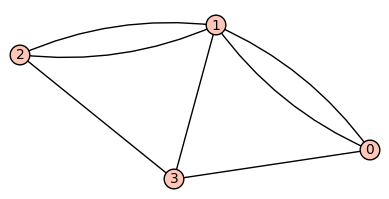

In [56]:
m=matrix([[0,2,0,1],[2,0,2,1],[0,2,0,1],[1,1,1,0]])
A=Graph(m)
A.show()

In [57]:
A.is_eulerian()

False

Podemos también definir grafos a partir de matrices de incidencia.

In [58]:
m=matrix([[1,1,0,0,0,0],[0,0,1,1,0,1],[0,0,0,0,1,1],[1,0,1,0,0,0],[0,1,0,1,1,0]])

In [59]:
A=Graph(m)

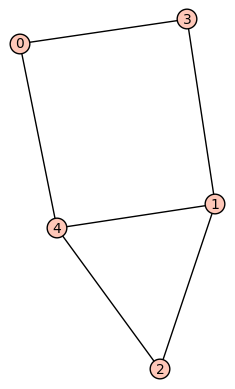

In [60]:
A.show()

**Ejemplo** (*Grafos hamiltonianos*) Podemos determinar si un grafo es Hamiltoniano. 

In [61]:
A=graphs.CompleteGraph(4)
A.is_hamiltonian()

True

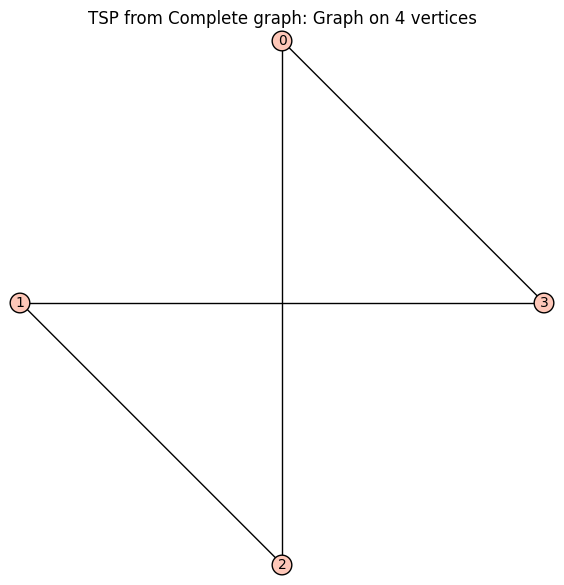

In [62]:
A.hamiltonian_cycle()

**Ejemplo** (*Grafos planos*) También podemos determinar si un grafo es o no plano.

In [63]:
A=graphs.CompleteGraph(4)
A.is_planar()

True

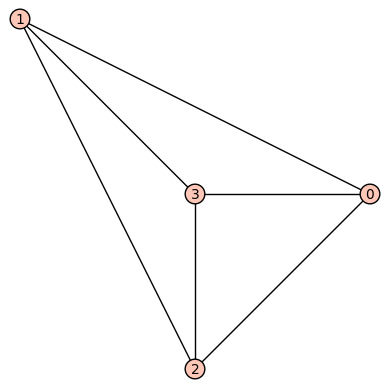

In [64]:
A.show(layout='planar')

In [65]:
A=graphs.CompleteBipartiteGraph(3,3)
A.is_planar()

False

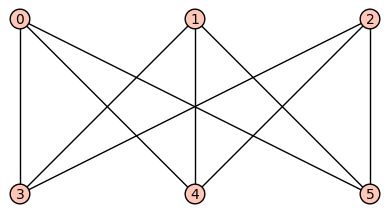

In [66]:
A.show()

**Ejemplo** (*Árboles generatrices*) Podemos calcular todos los árboles generatrices de un grafo (subgrafos de un grafo convexo que sen árboles)

In [67]:
A=graphs.CompleteGraph(4)
A.spanning_trees()

[Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices]

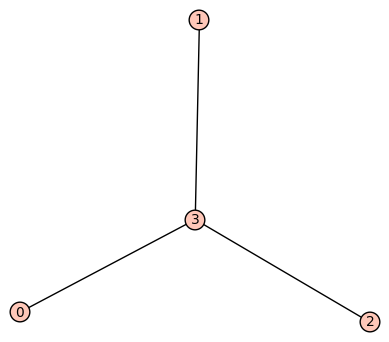

In [68]:
show(_[0])

**Ejemplo** (*Polinomios cromáticos*) Vamos a mostrar cómo calcular tanto el polinomio cromático como el número cromático

In [69]:
A=graphs.CompleteGraph(3)
p=A.chromatic_polynomial()

In [70]:
p

x^3 - 3*x^2 + 2*x

In [71]:
factor(p)

(x - 2) * (x - 1) * x

In [72]:
g.chromatic_number()

5